In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
import cv2
import os
import tensorflow as tf
tf.get_logger().setLevel('ERROR')

In [2]:
model_path = "../models/best_densenet121.h5"
model = load_model(model_path)

print("DenseNet121 model loaded successfully!")

DenseNet121 model loaded successfully!


In [4]:
inv_map = {
    0: "Covid",
    1: "Normal",
    2: "Viral Pneumonia"
}

print(inv_map)


{0: 'Covid', 1: 'Normal', 2: 'Viral Pneumonia'}


In [5]:
def predict_image(img_path):
    
    img = image.load_img(img_path, target_size=(224, 224))
    arr = image.img_to_array(img) / 255.0
    arr = np.expand_dims(arr, axis=0)

    preds = model.predict(arr)[0]

    predicted_index = np.argmax(preds)
    predicted_class = inv_map[predicted_index]
    confidence = preds[predicted_index] * 100

    print(f"Predicted Class: {predicted_class}")
    print(f"Confidence: {confidence:.2f}%")

    plt.imshow(img)
    plt.axis("off")
    plt.title(f"{predicted_class} ({confidence:.1f}%)")
    plt.show()

    return predicted_class, confidence


1/1 [==============================] - 0s 197ms/step
Predicted Class: Covid
Confidence: 96.76%


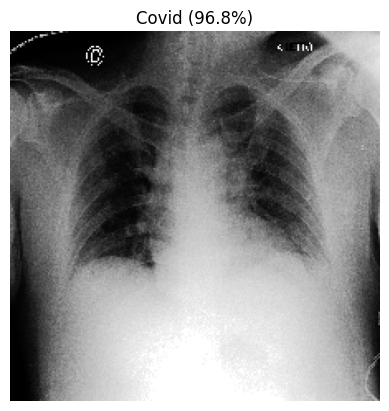

('Covid', 96.75754308700562)

In [7]:
img_path = "../data/processed/test/Covid/012.jpeg"  
predict_image(img_path)
